In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_1samp
import random
import data_reader, data_analyser, trajectory_plotter

dr = data_reader.DataReader()
exp_1, exp_2 = 'Exp 1', 'Exp 2'
choices_1, dynamics_1 = dr.get_data(path='../../data/HEM_exp_1/processed/', rename_vars=True, IT_threshold=1.5)
choices_2, dynamics_2 = dr.get_data(path='../../data/HEM_exp_2/processed/', rename_vars=True, IT_threshold=1.5)
choices = choices_2

#set precision for displaying float-point values in the notebook
pd.options.display.float_format = '{:,.3f}'.format
# color palette for sequential data
palette_sqn = 'viridis_r'
# color palette for participant IDs
palette_subj = 'magma_r'

# Example trajectories

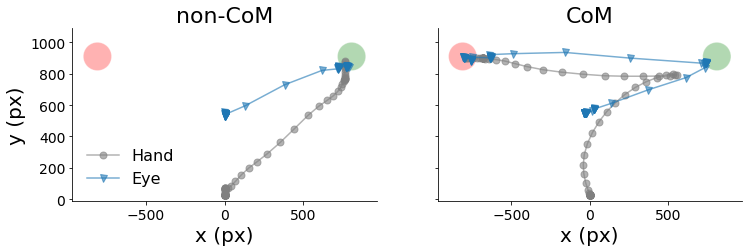

In [8]:
# tp = trajectory_plotter.TrajectoryPlotter()
da = data_analyser.DataAnalyser()

# choices, dynamics = choices_2, dynamics_2
# trajectory = da.get_random_trajectory(choices[~choices.is_com], dynamics[~choices.is_com], n=1)

x_lim = [-960-10, 960+10]
y_lim = [0-10, 1080+10]
left_resp_area_center = [-(960-150), (1080-170)]
right_resp_area_center = [(960-150), (1080-170)]
resp_area_radius = 90


def plot_traj_xy(ax, trajectory, title):
    ax.set_aspect('equal')
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    left_resp_area = plt.Circle(left_resp_area_center, resp_area_radius, alpha=0.3, facecolor='red', edgecolor='white')
    right_resp_area = plt.Circle(right_resp_area_center, resp_area_radius, alpha=0.3, facecolor='green', edgecolor='white')
    ax.add_artist(left_resp_area)
    ax.add_artist(right_resp_area)
    step=2
    ax.plot(trajectory.mouse_x[::step], trajectory.mouse_y[::step], marker='o', markersize=7, 
            alpha=0.6, label='Hand', color='grey')
    ax.plot(trajectory.eye_x[::step], trajectory.eye_y[::step], marker='v', markersize=7, 
            alpha=0.6, label='Eye')
    ax.set_title(title)
    ax.set_xlabel('x (px)')

def plot_example_traj_xy():
    fig, (ax1, ax2) = plt.subplots(figsize=(12,4), nrows=1,ncols=2, sharex=True, sharey=True, squeeze=True)

    # non-CoM example
    trajectory = dynamics_2.loc[(518, 1, 2, 26)]
    plot_traj_xy(ax1, trajectory, 'non-CoM')

    ax1.set_ylabel('y (px)')
    ax1.legend(loc='lower left', frameon=False)
    
    # CoM example
    trajectory = dynamics_2.loc[(624, 3, 10, 35)]
    plot_traj_xy(ax2, trajectory, 'CoM')
    
    plt.savefig('figures/traj_xy.png', bbox_inches='tight')

plot_example_traj_xy()

Now let's look at the x-dynamics of the same trajectories

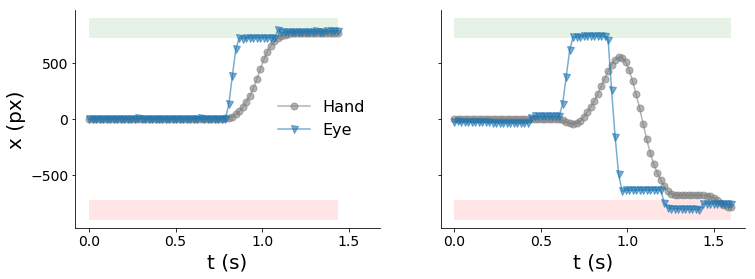

In [65]:
def plot_traj_x(ax, trajectory, title):
    step=2
    ax.plot(trajectory.timestamp[::step], trajectory.mouse_x[::step], marker='o', markersize=7, 
            alpha=0.6, label='Hand', color='grey')
    ax.plot(trajectory.timestamp[::step], trajectory.eye_x[::step], marker='v', markersize=7, 
            alpha=0.6, label='Eye')
#     ax.set_title(title)
    ax.set_xlabel('t (s)')
    ax.set_ylim(x_lim)
    
    y_error_l = (left_resp_area_center[0]-resp_area_radius)*np.ones_like(trajectory.timestamp[::step])
    y_error_u = (left_resp_area_center[0]+resp_area_radius)*np.ones_like(trajectory.timestamp[::step])
    
    ax.fill_between(trajectory.timestamp[::step], y_error_l, y_error_u, alpha=0.1, facecolor='red', edgecolor=None)
    
    y_correct_l = (right_resp_area_center[0]-resp_area_radius)*np.ones_like(trajectory.timestamp[::step])
    y_correct_u = (right_resp_area_center[0]+resp_area_radius)*np.ones_like(trajectory.timestamp[::step])
    
    ax.fill_between(trajectory.timestamp[::step], y_correct_l, y_correct_u, alpha=0.1, facecolor='green', edgecolor=None)

def plot_example_traj_x():
    fig, (ax1, ax2) = plt.subplots(figsize=(12,4), nrows=1,ncols=2, sharex=True, sharey=True, squeeze=True)

    # non-CoM example
    trajectory = dynamics_2.loc[(518, 1, 2, 26)]
    plot_traj_x(ax1, trajectory, 'non-CoM')
    ax1.set_ylabel('x (px)')
    ax1.legend(loc='center right', frameon=False)

    # CoM example
    trajectory = dynamics_2.loc[(624, 3, 10, 35)]
    plot_traj_x(ax2, trajectory, 'CoM')
    
    plt.savefig('figures/traj_x.png', bbox_inches='tight')

plot_example_traj_x()